# Statistics for Hackers Cond (by Jake Vanderplas)

__Thesis : The main point is asking the good questions.__

## Warm-up : 

You toss a coin __30 times__. It shows head __22 times__. Is it a fair coin ?

2 Points of view : 
- A fair coin should show 15 head.
- A fair coin could show 22 heads. It might be just chance. (Skeptic Hypothesis)

__Test the skeptic hypothesis first.__
What is the probability of showing 22 heads for a fair coin ?

__Mathematical Way__ : Binomal formula ==> 0.8 % (p = 0.008). It's less than 5 %. We can consider that the coin is not fair.

__Simpler way__ : Simulate it !

In [46]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

M = 0
for i in range(10000):
    trials = np.random.randint(2, size=30)
    if trials.sum() >= 22:
        M += 1

p = M / 10000

print("The probability the coin showing 22 heads on 30 trials is {:.2%}.".format(p))
print("This value is inferior to our P-value (5%). So, we can conclude this is not a fair coin")

The probability the coin showing 22 heads on 30 trials is 0.93%.
This value is inferior to our P-value (5%). So, we can conclude this is not a fair coin


In general :

__Computing__ the sampling distribution is __hard__.


__Simulating__ the sampling distribution is __esay__.

## Shuffling

Sneeches (starred-or-not duck)
- 2 populations : starred sneeches, not-starred sneeches
- Some of them pass a test. The results are:
    - starred score mean : 73.5
    - not-starred score mean = 66.9
    - difference = 6.6
    
Is the difference significant ?

__Mathematical method__ : 
- t-test ==> t = 0.932
- look at the p(t, nu) probability function
- nu has an approximation depending on the standart deviation
- plug the number. Look into the chart ==> t_crit = 1.7


==> so __t > t_crit__ is __False__. The difference is __not__ significant !  

__Simulating method__:
- shuffle score, reassign labels, compute means and difference (multiple times)
- plot the hist of the diff
- answer the question : in how much case the difference between two arbitrary groups is greater than 6.6 ? ==> 16 % 

==> 16 % > 5 %. This is not significant.

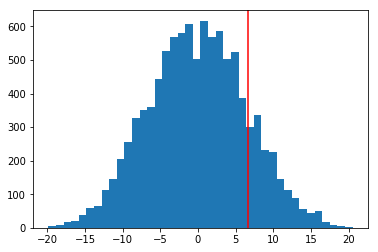

15.44% samples have a differences between the 2 arbitrary groups above 6.6.
This value is superior to our P-value (5%). So, we can conclude this is not significant.


In [51]:
starred_scores = [84, 72, 57, 46, 63, 76, 99, 91]
not_starred_scores = [81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69]

scores = np.array(starred_scores + not_starred_scores)

diffs = np.empty((10000,))

for i in range(10000):
    np.random.shuffle(scores)
    diff = scores[:8].mean() - scores[8:].mean()
    diffs[i] = diff
    
plt.hist(diffs, 40)
plt.axvline(x=6.6, color='r')
plt.show()
per = np.sum(diffs > 6.6)/ diffs.size

print("{:.2%} samples have a differences between the 2 arbitrary groups above 6.6.".format(per))
print("This value is superior to our P-value (5%). So, we can conclude this is not significant.")

## Bootstrapping



In [52]:
data = np.array([48,24,51,12,21,41,25,23,32,61,19,24,29,21,23,13,32,18,42,18])
xbar = np.empty((10000,))
for i in range(10000):
    sample = np.random.choice(data, size=20, replace=True)
    xbar[i] = sample.mean()
xbar.mean(), xbar.std()

(28.847115000000002, 2.8879603402358214)

## Cross-validation

